<h1><b> SONIFICATION STRATEGIES FOR DEEP-SPACE MATERIALS

___

<h2> III. Star Clusters

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
star_cluster_frames = []
for i in range(19):
    star_cluster_frames.append(pd.read_csv('DATA/star_clusters_2/c_{}00.csv'.format(str(i).zfill(2)), low_memory=False))

Each data frame represents one frame in the animation.  This means in order to follow the path of a given star it's position will need to be tracked across multiple data frames. 

In [3]:
star_cluster_frames[0]

,x,y,z,vx,vy,vz,m,id
0,0.485939,-0.524359,-0.531982,0.461539,-0.033776,-0.322765,0.000016,1
1,-0.065961,0.080844,-0.276031,-0.575780,1.107815,-0.293408,0.000016,2
2,-0.034809,0.076795,-0.390880,-0.553991,-0.173861,0.059251,0.000016,3
3,1.502104,1.442983,1.449747,-0.090266,0.326612,-0.310594,0.000016,4
4,-0.009554,0.538341,-0.267264,0.011855,-0.011874,-0.405565,0.000016,5
...,...,...,...,...,...,...,...,...
63995,-0.515370,0.834457,1.609291,0.317309,0.082150,-0.514357,0.000016,63996
63996,0.725611,-0.579058,0.973140,0.129194,-0.207819,0.259824,0.000016,63997
63997,-0.175569,-0.397390,0.163967,-0.137939,0.234582,-0.060062,0.000016,63998
63998,0.239999,0.625631,0.715540,-0.148245,0.351681,0.784334,0.000016,63999


In [13]:
star_cluster_frames[1]

,x,y,z,vx,vy,vz,m,id
0,-0.043497,0.105297,0.138277,-0.212943,-0.404257,-0.605191,0.000016,8427
1,-0.040714,0.108759,0.136523,0.204248,0.109212,-0.873800,0.000016,44328
2,-0.498487,-1.699947,0.132564,0.262516,-0.324764,0.562522,0.000016,4
3,-0.180061,0.772876,-0.091783,0.031714,0.423959,0.106319,0.000016,38907
4,0.011865,0.426583,0.485580,0.005719,-0.581521,-0.088140,0.000016,6
...,...,...,...,...,...,...,...,...
63992,1.058976,1.956077,-0.386337,-0.118746,-0.553942,-0.208733,0.000016,63996
63993,0.753311,0.004259,0.111236,-0.794958,-0.153329,0.131538,0.000016,63997
63994,0.064444,-0.159256,-0.620617,0.244356,-0.082614,-0.113567,0.000016,63998
63995,0.180758,1.093747,0.601112,-0.379059,-0.388060,0.007006,0.000016,63999


<b> WARNING: </b> this cell will take several minutes to process

In [7]:
X = [np.array([])]*64000
Y = [np.array([])]*64000
Z = [np.array([])]*64000
for i in range(64000):
    for frame in star_cluster_frames:
        idx = frame.index[frame['id']==(i+1)]
        if idx.size != 0:
            X[i] = np.append(X[i], frame.iloc[idx[0]]['x'])
            Y[i] = np.append(Y[i], frame.iloc[idx[0]]['y'])
            Z[i] = np.append(Z[i], frame.iloc[idx[0]]['z'])
        else:
            X[i] = np.append(X[i], X[i][-1])
            Y[i] = np.append(Y[i], Y[i][-1])
            Z[i] = np.append(Z[i], Z[i][-1])
    X[i] = np.interp(X[i], (X[i].min(), X[i].max()), (-1, 1))
    Y[i] = np.interp(Y[i], (Y[i].min(), Y[i].max()), (-1, 1))
    Z[i] = np.interp(Z[i], (Z[i].min(), Z[i].max()), (-1, 1))

In [25]:
def plot_coords(X, Y, Z):
    plt.figure(figsize=(20,5))
    for i in range(10):
        idx = random.randint(0,64000-1)
        plt.plot(X[idx], color='b')
        plt.plot(Y[idx], color='r')
        plt.plot(Z[idx], color='g')
    plt.xticks(range(19))
    plt.xlabel('Data Frame')
    plt.ylabel('Cartesian Coordinates')
    plt.legend(['x','y','z'])
    return plt.show()

### Random sampling of coordinate paths

The graph looks chaotic but this will make for an effective spatialization.

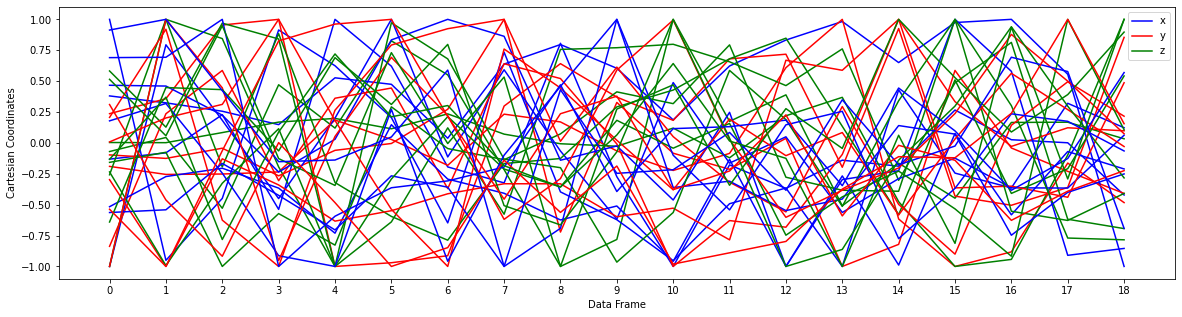

In [26]:
plot_coords(X, Y, Z)

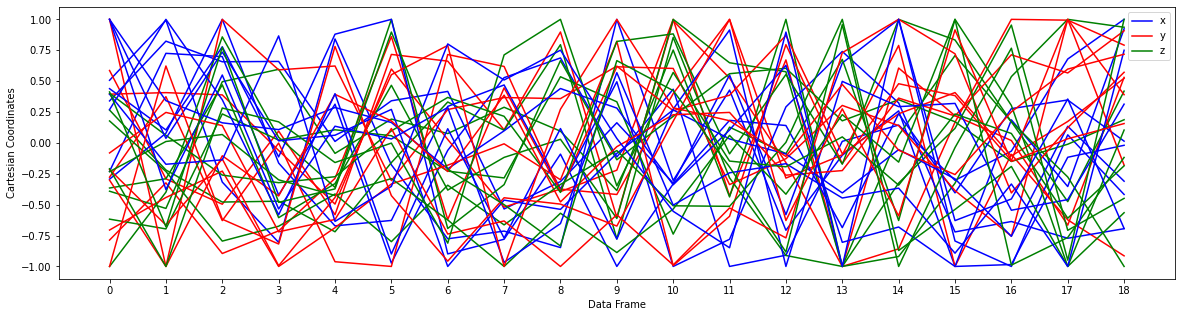

In [27]:
plot_coords(X, Y, Z)

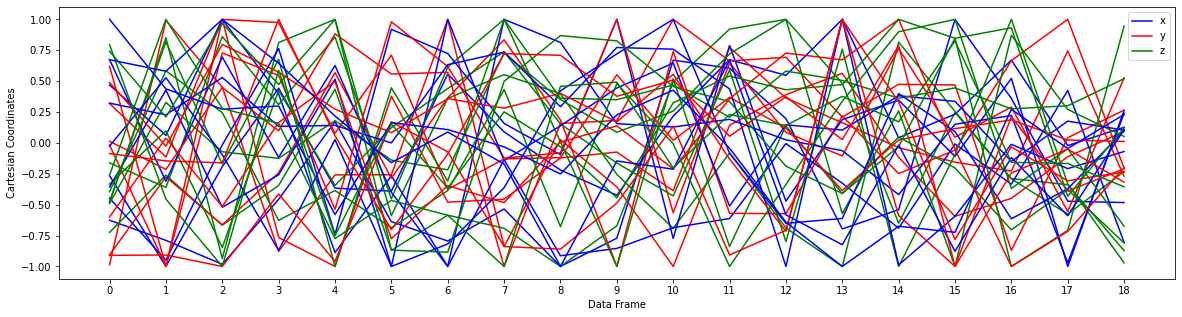

In [28]:
plot_coords(X, Y, Z)

In [20]:
def export_frames(matrix, file_name, rng):
    f = open(file_name, 'w')
    for i in range(rng):
        f.write(str(i+1) + ', ')
        for frame in matrix[i]:
            f.write(' ' + str(frame) + ' $1')
        f.write(';\n')
    f.close()

In [21]:
# export_frames(X, 'x_frames.txt', 64000)
# export_frames(Y, 'y_frames.txt', 64000)
# export_frames(Z, 'z_frames.txt', 64000)

### Average three velocity values

<b> WARNING: </b> this cell will take several minutes to process

In [18]:
V = [np.array([])]*64000
for i in range(64000):
    for frame in star_cluster_frames:
        idx = frame.index[frame['id']==(i+1)]
        if idx.size != 0:
            avg = (frame.iloc[idx[0]]['vx'] + frame.iloc[idx[0]]['vy'] + frame.iloc[idx[0]]['vz']) / 3
            V[i] = np.append(V[i], avg)
        else:
            V[i] = np.append(V[i], V[i][-1])
    V[i] = np.interp(V[i], (V[i].min(), V[i].max()), (-1, 1))

In [30]:
def plot_vels(V):
    plt.figure(figsize=(20,5))
    for i in range(10):
        idx = random.randint(0,64000-1)
        plt.plot(V[idx], color='b')
    plt.xticks(range(19))
    plt.xlabel('Data Frame')
    plt.ylabel('Cartesian Coordinates')
    plt.legend(['vel avg'])
    return plt.show()

### Random sampling of average velocities

These graphs also appear noisy but this will result in rich, constantly fluctuating pitching density.

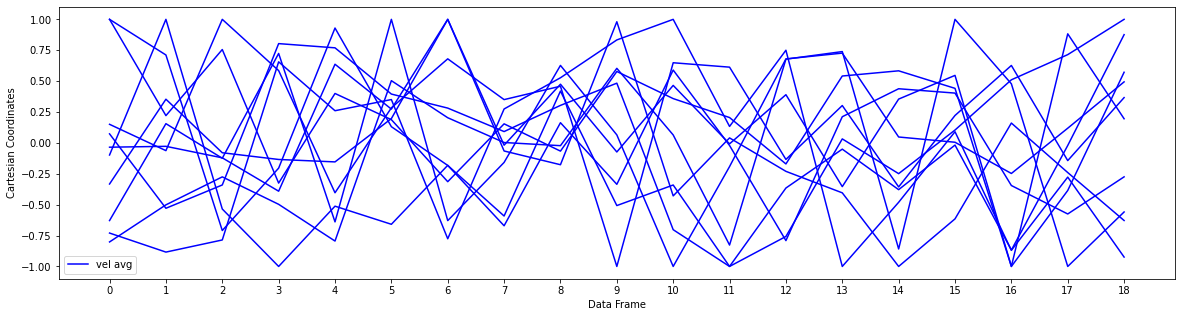

In [31]:
plot_vels(V)

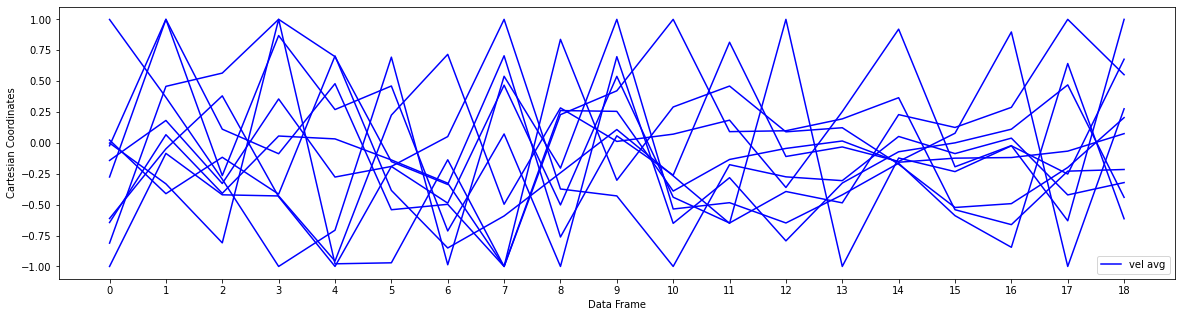

In [32]:
plot_vels(V)

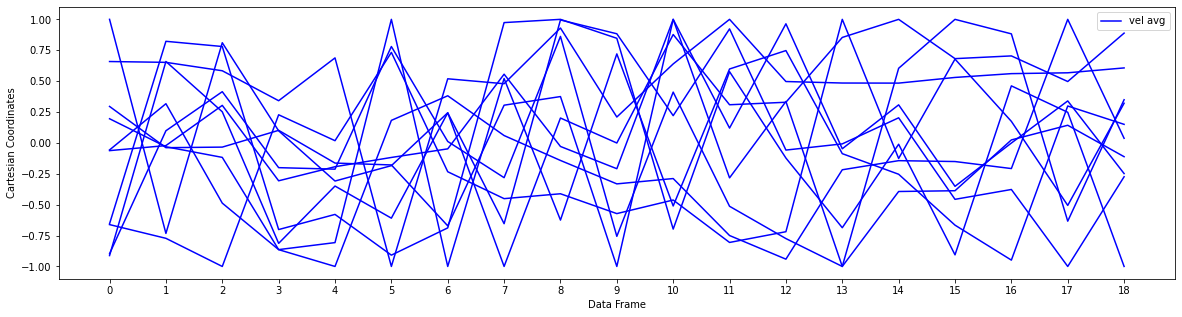

In [33]:
plot_vels(V)

In [24]:
# f = open('vel_avg_frames.txt', 'w')
# for i in range(64000):
#     f.write(str(i+1) + ', ')
#     for frame in V[i]:
#         f.write(' ' + str(frame) + ' $1')
#     f.write(';\n')

---